In [1]:
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

C:\Users\medam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
all_data = fetch_20newsgroups(shuffle=True,random_state=42)

In [4]:
all_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories = [
    'alt.atheism',
    'soc.religion.christian',
    'comp.graphics',
    'sci.med',
    'rec.sport.baseball',
]

In [6]:
all_data = fetch_20newsgroups(shuffle=True,random_state=42,categories=categories)

In [7]:
train_data, test_data, train_y, test_y = train_test_split(all_data.data,all_data.target,
                                                    test_size=0.4,
                                                    random_state=43)

In [8]:
all_data.target_names

['alt.atheism',
 'comp.graphics',
 'rec.sport.baseball',
 'sci.med',
 'soc.religion.christian']

In [9]:
print(np.array(test_data)[np.where(test_y==1)][50])

From: jfreund@taquito.engr.ucdavis.edu (Jason Freund)
Subject: Info on Medical Imaging systems
Organization: College of Engineering - University of California - Davis
Lines: 10


	Hi, 

	Is anyone into medical imaging?  I have a good ray tracing background,
and I'm interested in that field.  Could you point me to some sources?  Or
better yet, if you have any experience, do you want to talk about what's
going on or what you're working on?

Thanks,
Jason Freund



In [10]:
import re
def only_lower(word):
    word=word.lower()
    return re.sub(r'[^a-z]', " ", word)

In [11]:
def do_nothing(d):
    return d

In [12]:
re_guillotine = re.compile(r"^.*?:")
def guillotine(d):
    return re_guillotine.sub("",d)

In [13]:
def search_head(d):
    ret = re_guillotine.match(d)
    if ret:
        ret = ret.group().replace(":","")
    return ret

In [15]:
import re
header_finder = re.compile("[^ \t]+:")
a=search_head("acaa:aaaa")
a.group()

AttributeError: 'str' object has no attribute 'group'

In [16]:
#Vocab
def make_vocab(src,convert_word,stopwords):
    vocab =  set([])
    stopwords = list(map(convert_word,stopwords))
    for doc in src:
        lines = doc.split("\n")
        for line in lines:
            line = convert_word(line)
            words = line.split(" ")
            for word in words:
                if not(word in stopwords): 
                    vocab.add(word)
    return np.array(list(vocab))

In [17]:
#Bag of Words
#Stop wordsをつぶす
def data2bow(data,vocab,convert_word):
    bows = np.ndarray((len(data),len(vocab)))
    for (i,doc) in enumerate(data):
        lines = doc.split("\n")
        bow = bows[i,:]
        for line in lines:
            line = convert_word(line)
            words = line.split(" ")
            for word in words:
                word;
                for (j,word_voc) in enumerate(vocab):
                    if word_voc == word:
                        bow[j]+=1
                        break
        print(i)
    return bows

In [18]:
#Bag of Words
#Stop wordsをつぶす
def line2bow(line,vocab,convert_word):
    bow = np.ndarray((len(vocab)))
    line = convert_word(line)
    words = line.split(" ")
    for word in words:
        word;
        for (j,word_voc) in enumerate(vocab):
            if word_voc == word:
                bow[j]+=1
                break
    return bow

In [19]:
def get_header_voc(data):
    header_voc=set()
    for doc in data:
        lines = doc.split("\n")
        for line in lines:
            if line=="":
                break;
            if header_finder.match(line):
                words = line.split(":")
                header_voc.add(words[0])
    return np.array(list(header_voc))

In [20]:
def get_header_lines(data,voc):
    header_lines = np.ndarray(shape=(len(data),voc.shape[0]),dtype='<U100')
    for (i,doc) in enumerate(data):
        lines = doc.split("\n")
        for line in lines:
            if line=="":
                break;
            head = search_head(line)
            if head:
                for (j,voc_word) in enumerate(voc):
                    if(head==voc_word):
                        header_lines[i,j] = guillotine(line)
                        break
                    
    return header_lines

In [21]:
def get_full_bow(data,voc,useful_header,convert_word):
    full_bow = np.ndarray(shape=(len(data),voc.shape[0]*(len(useful_header)+1)))
    print(full_bow.shape)
    for (i,doc) in enumerate(data):
        print(i)
        lines = doc.split("\n")
        for h in range(len(lines)):
            line = lines[h]
            if line=="":
                h_end = h
                break
            head = search_head(line)
            if head:
                for (j,header_name) in enumerate(useful_header):
                    if(head==header_name):
                        full_bow[i,voc.shape[0]*(j+1):voc.shape[0]*(j+2)]=line2bow(line,voc,convert_word)
                        break
        for h in range(h_end+1,len(lines)):
            line = lines[h]
            line = convert_word(line)
            words = line.split(" ")
            for word in words:
                for (j,word_voc) in enumerate(voc):
                    if word_voc == word:
                        full_bow[i,j]+=1
                        break
                    
    return full_bow

In [22]:
with open('stopwords.txt',mode='r') as f:
    stopwords=f.readlines()
stopwords_raw = list(map(lambda x:x.replace('\n',''),stopwords))
stopwords_re = make_vocab(stopwords_raw,only_lower,stopwords=[])

In [23]:
vocab_re = make_vocab(train_data,only_lower,stopwords=stopwords_re)
#train_X_re=data2bow(train_data,vocab_re,only_lower)
#test_X_re=data2bow(test_data,vocab_re,only_lower)
#vocab_raw = make_vocab(do_nothing,only_lower,stopwords=stopwords)
#train_X_raw  =data2bow(train_data,vocab_raw,do_nothing,stopwords=stopwords)
#test_X_raw  =data2bow(test_data,vocab_raw,do_nothing,stopwords=stopwords)

In [24]:
header_voc = get_header_voc(train_data)
header_voc

array(['Article-I.D.', 'Nntp-Posting-Host-[nntpd-681]', 'X-Disclaimer',
       'Organization', 'X-Bytes', 'X-NewsSoftware', 'X-Xxdate',
       'Supersedes', 'In-reply-to', 'Nntp-Posting-Host', 'X-XXMessage-ID',
       'X-Gated-By', 'Reply-To', 'X-UserAgent', 'Comments', 'From',
       'Nntp-Posting-User', 'Expires', 'Summary', 'Disclaimer', 'Lines',
       'Subject', 'X-Posted-From', 'X-Mailer', 'X-Newsreader', 'X-XXDate',
       'Keywords', 'Distribution', 'Originator', 'Return-Path', 'X-Reader',
       'NNTP-Posting-Host', 'X-Xxmessage-Id', 'Posting-Front-End',
       'News-Software', 'X-News-Reader', 'X-Useragent', 'In-Reply-To'], 
      dtype='<U29')

In [25]:
h_bow=get_header_lines(train_data,header_voc)

In [26]:
sum(h_bow!="")[np.argsort(sum(h_bow!=""))[::-1]]

array([1712, 1712, 1705, 1639,  311,  269,  268,  258,  131,   84,   75,
         57,   44,   24,   24,   11,    8,    7,    7,    6,    6,    4,
          4,    4,    3,    3,    2,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1])

In [27]:
useful_header=header_voc[np.argsort(sum(h_bow!=""))[:-5:-1]]

In [44]:
import pandas as pd
df_h=pd.DataFrame(h_bow[:,np.argsort(sum(h_bow!=""))[:-5:-1]],columns=header_voc[np.argsort(sum(h_bow!=""))[:-5:-1]])
df_h

,From,Subject,Lines,Organization
0,mmontgom@liberty.uc.wlu.edu (Matthew R. Montg...,Re: With a surge in the last two weeks...,15,Washington & Lee University
1,acooper@mac.cc.macalstr.edu,Re: some thoughts.,100,Macalester College
2,besmith@uncc.edu (Brian E Smith),Re: Rayshade query,22,University of NC at Charlotte
3,perry@dsinc.com (Jim Perry),Re: The Inimitable Rushdie,72,Decision Support Inc.
4,conditt@tsd.arlut.utexas.edu (Paul Conditt),Re: Being right about messiahs,11,"Applied Research Laboratories, University of ..."
5,maridai@comm.mot.com (Marida Ignacio),Re: Every Lent He suffers to save us,59,trunking_fixed
6,NO E-MAIL ADDRESS@eicn.etna.ch,XV under MS-DOS ?!?,24,"EICN, Switzerland"
7,will@futon.webo.dg.com (Will Taber),Re: Being right about messiahs,41,
8,lineber@lonestar.utsa.edu (Jerry M. Lineberry),Pov-ray problem / Please Help...,12,University of Texas at San Antonio
9,paj@uk.co.gec-mrc (Paul Johnson),Re: sore throat,29,"GEC-Marconi Research Centre, Great Baddow, UK"


In [43]:
a=df_h['From'].values
len(a)

1712

In [40]:
len(set(a))

1029

In [45]:
import time 

In [46]:
start = time.time()
a=get_full_bow(train_data,np.array(vocab_re),useful_header,only_lower)
time.time() - start

(1712, 135060)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273

30521.408609628677

In [47]:
start = time.time()
b=get_full_bow(test_data,np.array(vocab_re),useful_header,only_lower)
time.time() - start

(1142, 135060)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273

52989.55277991295

In [46]:
start = time.time()
X_re=data2bow(train_data[:10],vocab_re,only_lower)
time.time() - start

0
1
2
3
4
5
6
7
8
9


31.023789167404175

In [30]:
category_dict = dict([(x, str(x)) for x in range(5)])

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(category_dict))
    plt.xticks(tick_marks, category_dict, rotation=45)
    plt.yticks(tick_marks, category_dict)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
import pickle
with open('vocab.pickle', mode='wb') as f:
    pickle.dump(vocab, f)
with open('bows.pickle', mode='wb') as f:
    pickle.dump(bows, f)

NameError: name 'vocab' is not defined

In [22]:
import pickle
with open('vocab.pickle', mode='rb') as f:
    vocab=pickle.load(f)
with open('bows.pickle', mode='rb') as f:
    bows=pickle.load(f)

In [449]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.svm import SVC

min_samples_leaves = [10,30,100,300,1000,3000]

train_X=train_X_re[:,np.where(sum(train_X_re)>10)[0]]
test_X=test_X_re[:,np.where(sum(train_X_re)>10)[0]]
for leaf in min_samples_leaves:
    
    #pca=PCA(whiten=False)
    #pca.fit(train_X)
    #train_X = pca.transform(train_X)
    
    #lda = LinearDiscriminantAnalysis()
    #lda.fit(train_X, train_y)
    #train_X = lda.transform(train_X)
    
    clf = RandomForestClassifier(n_estimators=leaf,max_features=5,n_jobs=-1,random_state=42)
    clf = clf.fit(train_X, train_y)
    pred_tr_y = clf.predict(train_X)
    trainsc = f1_score(train_y[:len(pred_tr_y)], pred_tr_y, average='macro')
    
    #test_X = pca.transform(test_X)
    #test_X = lda.transform(test_X)
    pred_y = clf.predict(test_X)
    testsc = f1_score(test_y[:len(pred_y)], pred_y, average='macro')
    print("%dleaves:train%.2f%%:test%.2f%%"%(leaf,trainsc*100,testsc*100))

10leaves:train99.88%:test78.55%
30leaves:train100.00%:test88.34%
100leaves:train100.00%:test90.66%
300leaves:train100.00%:test91.57%
1000leaves:train100.00%:test91.46%
3000leaves:train100.00%:test91.35%


In [508]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.svm import SVC

min_samples_leaves = [10,30,100,300,1000]

train_X=train_X_re[:,np.where(sum(train_X_re)>4)[0]]
test_X=test_X_re[:,np.where(sum(train_X_re)>4)[0]]
for leaf in min_samples_leaves:
    
    clf = RandomForestClassifier(n_estimators=leaf,max_features=10,n_jobs=-1,random_state=40,class_weight="balanced")
    clf = clf.fit(train_X, train_y)
    pred_tr_y = clf.predict(train_X)
    trainsc = f1_score(train_y[:len(pred_tr_y)], pred_tr_y, average='macro')
    
    pred_y = clf.predict(test_X)
    testsc = f1_score(test_y[:len(pred_y)], pred_y, average='macro')
    print("%dleaves:train%.2f%%:test%.2f%%"%(leaf,trainsc*100,testsc*100))

10leaves:train99.77%:test80.50%
30leaves:train100.00%:test89.61%
100leaves:train100.00%:test91.38%
300leaves:train100.00%:test92.29%
1000leaves:train100.00%:test92.08%


In [267]:
train_X.shape

(2283, 5413)

train100.00%:test92.19%
Confusion matrix, without normalization
[[158   5   4   1  17]
 [  0 238   0   0   0]
 [  0   9 239   0   0]
 [  0  37   3 188   3]
 [  0  10   0   0 230]]
[ 100.     79.6    97.15   99.47   92.  ]
[  85.41  100.     96.37   81.39   95.83]


['alt.atheism',
 'comp.graphics',
 'rec.sport.baseball',
 'sci.med',
 'soc.religion.christian']

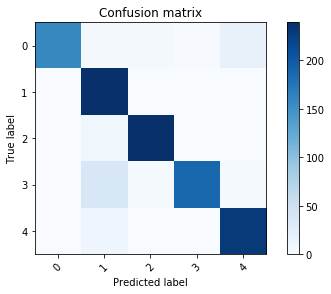

In [509]:

train_X=train_X_re[:,np.where(sum(train_X_re)>4)[0]]
test_X=test_X_re[:,np.where(sum(train_X_re)>4)[0]]

#pca=PCA(whiten=False)
#pca.fit(train_X)
#train_X = pca.transform(train_X)

#lda = LinearDiscriminantAnalysis()
#lda.fit(train_X, train_y)
#train_X = lda.transform(train_X)

clf = RandomForestClassifier(n_estimators=10000,n_jobs=-1,max_features=10,random_state=11,class_weight="balanced")
clf = clf.fit(train_X, train_y)
pred_tr_y = clf.predict(train_X)
trainsc = f1_score(train_y[:len(pred_tr_y)], pred_tr_y, average='macro')

#test_X = pca.transform(test_X)
#test_X = lda.transform(test_X)
pred_y = clf.predict(test_X)
testsc = f1_score(test_y[:len(pred_y)], pred_y, average='macro')
print("train%.2f%%:test%.2f%%"%(trainsc*100,testsc*100))
# Compute confusion matrix
cm = confusion_matrix(test_y, pred_y)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
acc = []
rec = []
for i in range(5):
    acc.append(cm[i,i]/sum(cm[:,i])*100)
    rec.append(cm[i,i]/sum(cm[i,:])*100)
print(np.round(acc,2))
print(np.round(rec,2))
all_data.target_names

In [47]:
16/571

0.028021015761821366

In [48]:
len(vocab_re)

27012

In [49]:
print(clf.feature_importances_[np.argsort(clf.feature_importances_)[::-1][:10]])

NameError: name 'clf' is not defined

In [50]:
def voc_where(where):
    return np.array(vocab_re)[np.argsort(sum(test_X_re[np.where(where)]!=0))[::-1][:10]]

In [51]:
sum(test_X_re[np.where(where)]!=0)

NameError: name 'test_X_re' is not defined

In [52]:
d={'also',
 'anyone',
 'apr',
 'article',
 'com',
 'even',
 'get',
 'good',
 'just',
 'know',
 'like',
 'make',
 'may',
 'new',
 'now',
 'one',
 'organization',
 'reply',
 'since',
 'think',
 'time',
 'university',
 'way',
 'well',
 'will',
 'writes'}

In [53]:
a=np.array(list(map(lambda x:len(x),np.array(test_data)[(pred_y==1) * (test_y==3)])))
sum(a)/a.shape

NameError: name 'pred_y' is not defined

In [54]:
a=np.array(list(map(lambda x:len(x),np.array(test_data)[(pred_y==1) * (test_y==1)])))
sum(a)/a.shape

NameError: name 'pred_y' is not defined

In [55]:
sum(test_X_re[np.where(test_y==0)])[np.array(list(map(lambda w:vocab_re.index(w),d)))]

NameError: name 'test_X_re' is not defined

In [56]:
sum(test_X_re[np.where(test_y==1)])[np.array(list(map(lambda w:vocab_re.index(w),d)))]

NameError: name 'test_X_re' is not defined

In [57]:
sum(test_X_re[np.where(test_y==2)])[np.array(list(map(lambda w:vocab_re.index(w),d)))]

NameError: name 'test_X_re' is not defined

In [431]:
sum(test_X_re[np.where(test_y==3)])[np.array(list(map(lambda w:vocab_re.index(w),d)))]

array([  25.,   44.,   21.,   39.,   82.,   82.,   23.,   36.,  106.,
         55.,   22.,   42.,   21.,   48.,  263.,   33.,   88.,   20.,
         48.,   35.,   26.,   49.,   76.,   39.,   22.,   31.])

In [432]:
sum(test_X_re[np.where(test_y==4)])[np.array(list(map(lambda w:vocab_re.index(w),d)))]

array([  47.,   81.,   34.,   68.,  160.,   85.,   40.,   80.,  117.,
         83.,   39.,   75.,   41.,  105.,   87.,   37.,   63.,   44.,
         53.,  100.,   47.,   37.,  137.,   50.,   28.,   22.])

In [484]:
set(voc_where((pred_y==1) * (test_y==3)))-set(voc_where((pred_y==1) * (test_y!=3)))-set(voc_where((pred_y!=1) * (test_y==3)))

{'help', 'information', 'mail', 'please', 'state'}

In [473]:
test_X_re[np.where(((pred_y==1)))][:,np.where(np.array(vocab_re) =='find' )[0]]+\
test_X_re[np.where(((pred_y==1)))][:,np.where(np.array(vocab_re) =='help' )[0]]+\
test_X_re[np.where(((pred_y==1)))][:,np.where(np.array(vocab_re) =='information' )[0]]+\
test_X_re[np.where(((pred_y==1)))][:,np.where(np.array(vocab_re) =='mail' )[0]]+\
test_X_re[np.where(((pred_y==1)))][:,np.where(np.array(vocab_re) =='please' )[0]]+\
test_X_re[np.where(((pred_y==1)))][:,np.where(np.array(vocab_re) =='state' )[0]]

array([[ 35.],
       [  1.],
       [  0.],
       [  1.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  3.],
       [  2.],
       [  1.],
       [  3.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  1.],
       [  0.],
       [  0.],
       [  0.],
       [  2.],
       [  0.],
       [  0.],
       [  0.],
       [  2.],
       [  0.],
       [  3.],
       [  2.],
       [  1.],
       [  0.],
       [  2.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  1.],
       [  5.],
       [  1.],
       [  1.],
       [  1.],
       [  0.],
       [  1.],
       [  2.],
       [  1.],
       [  0.],
       [  0.],
       [  1.],
       [  3.],
       [  5.],
       [  1.],
       [  0.],
       [  6.],
       [  0.],
       [  0.],
       [  2.],
       [  1.],
       [  4.],
       [  0.],
       [  0.],
       [  3.],
       [  0.],
       [  1.],
       [  1.],
       [  2.],
       [  

In [456]:
test_y[np.where(test_X[:,228]>0)]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [453]:
set(voc_where(test_y==0)) & set(voc_where(test_y==1)) & set(voc_where(test_y==2)) & set(voc_where(test_y==3)) & set(voc_where(test_y==4))

{'c',
 'first',
 'many',
 'might',
 'much',
 'point',
 'see',
 'still',
 'two',
 'world'}

In [364]:
set(voc_where(train_y==0)) & set(voc_where(train_y==1)) & set(voc_where(train_y==2)) & set(voc_where(train_y==3)) & set(voc_where(train_y==4))

IndexError: index 572 is out of bounds for axis 0 with size 571

In [1]:
voc_where(test_y==3)

NameError: name 'voc_where' is not defined

In [483]:
voc_where(True)

array(['comparison', 'ram', 'limit', 'called', 'ph', 'feel', 'released',
       'generated', 'telephone', 'room'], 
      dtype='<U78')

In [371]:
print(np.array(vocab_re)[np.argsort(clf.feature_importances_)[::-1][:100]])

['via' 'tingled' 'emphasizes' 'christie' 'suppliers' 'ops' 'varied'
 'descending' 'mantle' 'rocking' 'aday' 'injustices' 'definied' 'herbalism'
 'retinopathy' 'itc' 'asd' 'clergy' 'homeric' 'pocoroba' 'rgc' 'limp'
 'tranny' 'rtrace' 'deserving' 'caliber' 'max' 'edition' 'otto' 'confesses'
 'oftimes' 'studied' 'frontends' 'resolved' 'truecolor' 'amply' 'oranges'
 'timor' 'grimms' 'arounf' 'shirley' 'drifting' 'monsoon' 'channeled'
 'false' 'rawlins' 'bls' 'inria' 'peril' 'assistance' 'lis' 'eactly'
 'honors' 'platz' 'capillaries' 'folate' 'peel' 'replying' 'multiverse'
 'glances' 'mine' 'byproducts' 'enrish' 'forgiveness' 'mjones' 'arguing'
 'septra' 'skeeter' 'swan' 'coulter' 'schaeffers' 'sebastian' 'hooked'
 'mythen' 'northampton' 'hounds' 'hadley' 'penalty' 'refereeing' 'avenger'
 'mogal' 'hypothetically' 'suddenly' 'venus' 'cape' 'mongering' 'gluttony'
 'capitalist' 'underdogs' 'dhinn' 'carry' 'orono' 'rick' 'ignorant'
 'supermarket' 'evaluations' 'writings' 'papacy' 'farr' 'cipale

In [370]:
np.argsort(clf.feature_importances_)[::-1][:50]

array([2428,  198, 3374, 1173, 9946, 1586, 2499, 7756, 3475, 5915, 1914,
       7630, 7040, 3029, 5683, 6079, 1942, 4492, 4397, 6202,  401, 4980,
       6175, 4990, 5146, 1652, 4126, 9400, 5254, 4133, 6062, 9567, 3931,
       4851, 2784, 9602, 2821, 8869, 8503, 1920, 1549, 2856,  978, 7851,
       4844, 2367, 9955, 5623,  439, 8300], dtype=int64)

In [369]:
clf.feature_importances_

array([  2.86e-05,   2.48e-05,   2.14e-05, ...,   3.63e-04,   3.15e-06,
         1.07e-05])